<a href="https://colab.research.google.com/github/brendampa/IA_aumentada_MachineLearning-/blob/main/IA_Modelo_atraso_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando os dados

##Entendendo o conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 2.2.2
Versão do numpy: 2.0.2
Versão do scikit-learn (sklearn): 1.6.1
Versão do seaborn: 0.13.2
Versão do yellowbrick: 1.5


In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/brendampa/IA_aumentada_MachineLearning-/refs/heads/main/flights.csv')

In [3]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
#Últimos 5 linhas
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
#linhas , colunas:
dados.shape

(71175, 11)

In [6]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
#Incluindo colunas categóricas

dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


##Visualizações gráficas dos dados

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index() #reset_index() transforma em DataFrame
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


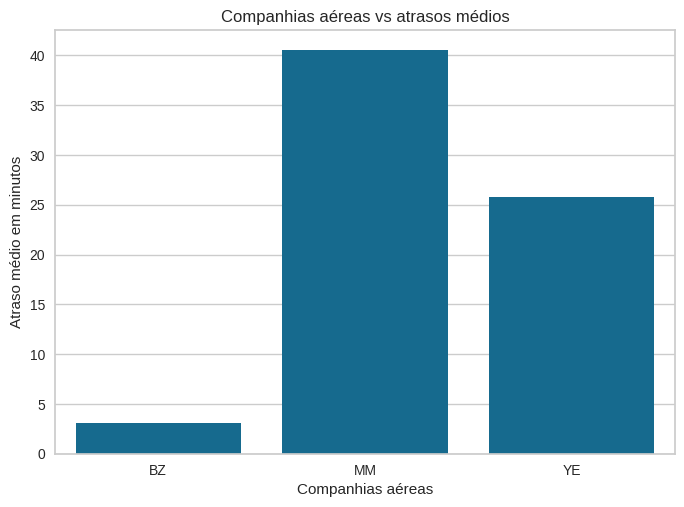

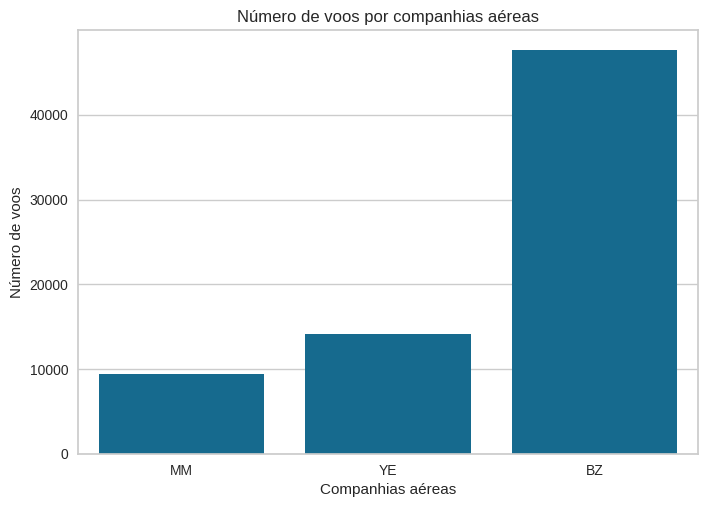

In [11]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(x='airline', data=dados)
plt.title('Número de voos por companhias aéreas')
plt.xlabel('Companhias aéreas')
plt.ylabel('Número de voos')
plt.show()

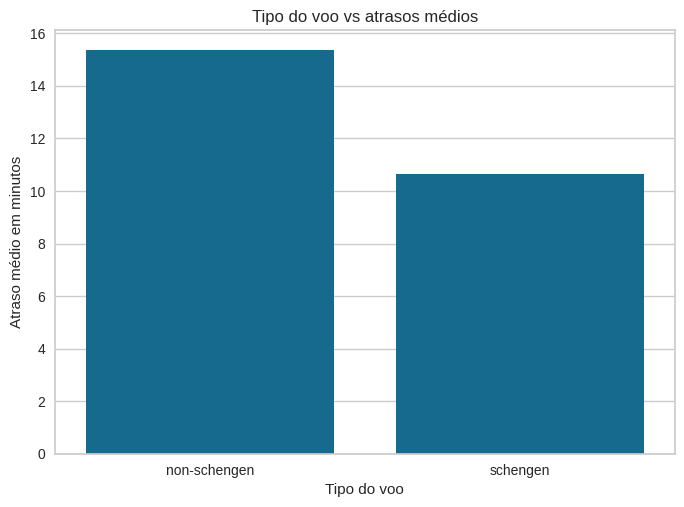

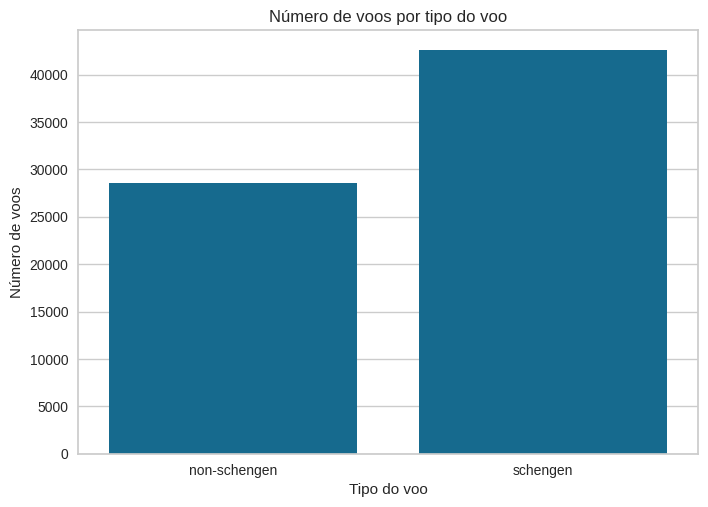

In [12]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(x='schengen', data=dados)
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

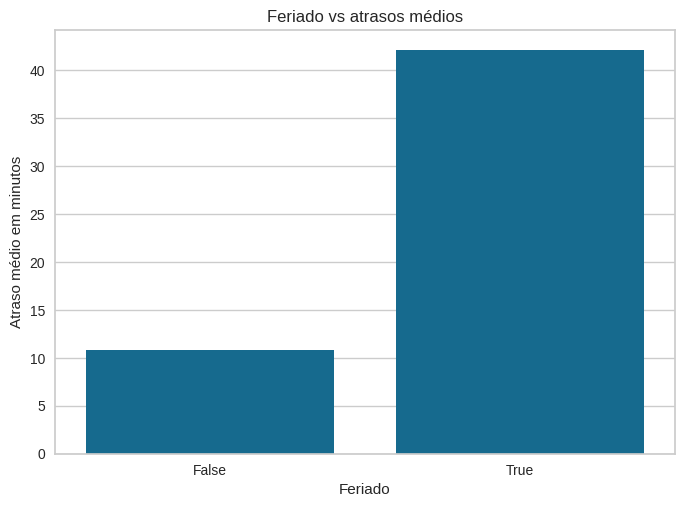

In [13]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('Feriado')
plt.ylabel('Atraso médio em minutos')
plt.show()

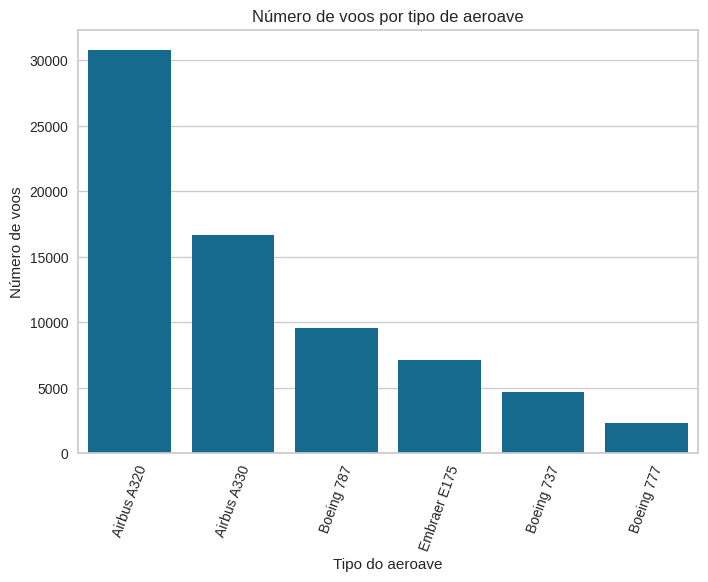

In [14]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type', data=dados, order = order)
plt.title('Número de voos por tipo de aeroave')
plt.xticks(rotation=70)
plt.xlabel('Tipo do aeroave')
plt.ylabel('Número de voos')
plt.show()

##Analisando a distribuição dos dados

In [15]:
#Freedman Diaconis: calcula o número de bins com base na Regra de Sturges

import numpy as np

def calcular_largura_bn(df,coluna):
  Q75,Q25 = np.percentile(df[coluna],[75,25])
  IQR = Q75 - Q25
  largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
  return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

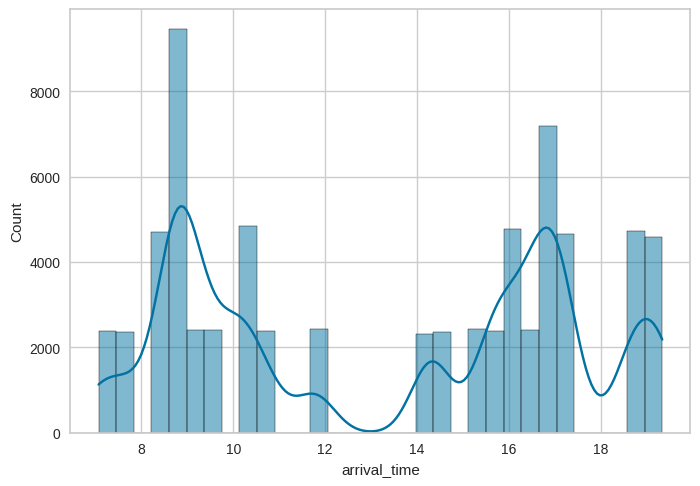

In [16]:
#Horário de chegada
largura_bin_at = calcular_largura_bn(dados,'arrival_time')

sns.histplot(data=dados,x='arrival_time', kde=True,binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

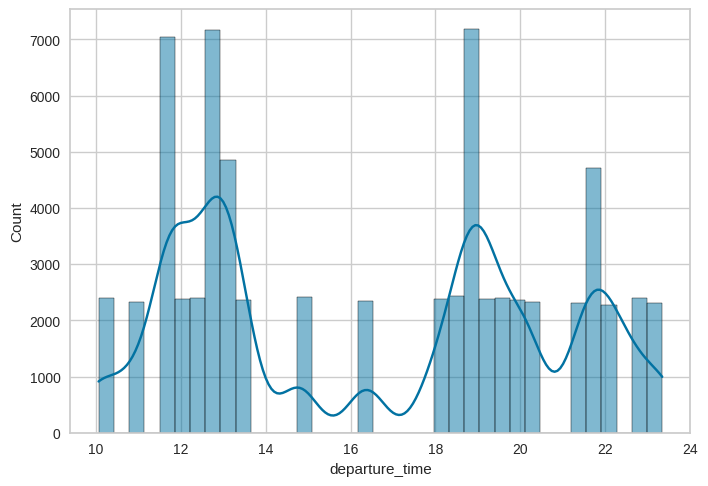

In [17]:
#Horário de saída
largura_bin_at = calcular_largura_bn(dados,'departure_time')

sns.histplot(data=dados,x='departure_time', kde=True,binwidth=largura_bin_at)

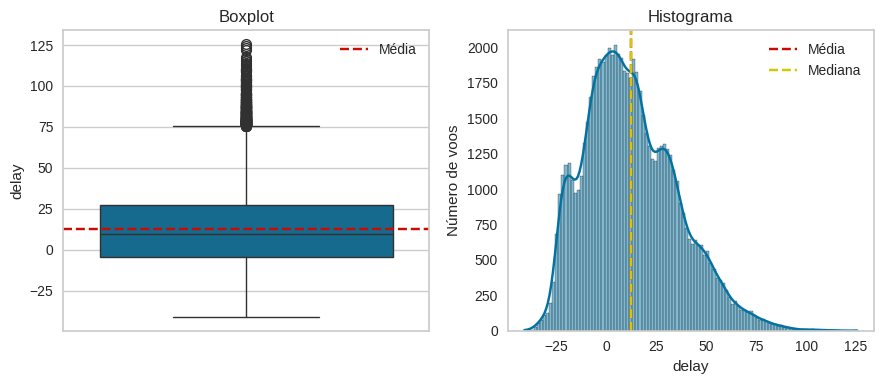

In [18]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig,axes = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bn(dados,'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=mean_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

#Feature Engineering

Feature engineering é um conceito fundamental no campo da ciência de dados e aprendizado de máquina, e desempenha um papel crucial no processo de desenvolvimento de modelos preditivos e analíticos. Essa técnica envolve a criação, transformação e seleção de variáveis, também conhecidas como "features", a partir dos dados brutos disponíveis, a fim de melhorar o desempenho dos modelos.

Features são as variáveis ou atributos que um modelo de machine learning utiliza para fazer previsões ou classificações.

Ajustando o formato da data

In [19]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [20]:
#Transformando para string
dados['year'].astype(str)

,year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
71170,2022
71171,2022
71172,2022
71173,2022


In [21]:
#Transformando para string
(dados['day']+1).astype(str) #O pandas não interpreta o 0 como um dia, então soma a 1 para funcionar.

,day
0,1
1,1
2,1
3,1
4,1
...,...
71170,365
71171,365
71172,365
71173,365


In [22]:
#Concatenando Ano-dia do ano

dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str),format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [23]:
#Sinalizando finais de semana ou não
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [24]:
#Retornar o nome do dia

dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


##Feature Encoding

In [25]:
#Iniciando a tratar variáveis categóricas true/false
#Identificando quais variáveis tem apenas 2 valores
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [26]:
#Identificando qual o conteúdo dos valores

dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [27]:
dados['is_holiday'].unique()

array([False,  True])

In [28]:
dados['is_weekend'].unique()

array([False,  True])

In [29]:
#Para converter essa coluna para 0/1 é necessário alterar o tipo
dados['is_weekend'] = dados['is_weekend'].astype(int)

In [30]:
#substituir por 0/1
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen' : 1})
dados['is_holiday'] = dados['is_holiday'].replace({'False': 0, 'True' : 1})
dados['is_weekend'] = dados['is_weekend'].replace({'False': 0, 'True' : 1})

dados.head()

/tmp/ipython-input-3010757941.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen' : 1})


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,0,Friday


In [31]:
#Variáveis categóricas
variaveis_categoricas = ['airline','aircraft_type','origin','day_name']

In [32]:
#
df_encoded = pd.get_dummies(data=dados,columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


##Limpando os dados

In [33]:
dados.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay',
       'date', 'is_weekend', 'day_name'],
      dtype='object')

In [34]:
#Removendo colunas que poderiam atrapalhar o modelo, como a flight_id
#Departure e arrival time tem o histograma bem parecidos e tem correlações muito próximas, transmitindo quase a mesma informação.
#Colunas de datas: date, year, day por que não é análise temporal
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [35]:
df_clean = df_encoded.drop(['flight_id','departure_time','day','year','date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,False,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,False,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,False,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,False,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,False,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


#Seleção e Validação do modelo

###Modelo Dummy Regressor

In [36]:
x = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [38]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(x_train, y_train)

DummyRegressor()

In [39]:
y_pred_dummy = model_dummy.predict(x_test)

In [40]:
y_pred_dummy #média

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [41]:
#Verificando se está um modelo ok com métricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def calcular_metricas_regressao(y_test, y_pred):
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas = {
      'Raiz do erro quadrático médio': rmse,
      'Erro absoluto médio': mae,
      'R2 score': r2
  }

  return metricas

In [42]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do erro quadrático médio': np.float64(23.224091171553688),
 'Erro absoluto médio': 18.61274919443058,
 'R2 score': -1.1633024256108015e-05}

###Modelo RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
#Crianod modelo
model_RF = RandomForestRegressor(max_depth = 5, random_state = 42)
#Treinando modelo
model_RF.fit(x_train, y_train)
#Criando a previsão
y_pred_RF = model_RF.predict(x_test)
#Avaliando modelo
calcular_metricas_regressao(y_test, y_pred_RF)

{'Raiz do erro quadrático médio': np.float64(13.730147618860693),
 'Erro absoluto médio': 11.013830187547443,
 'R2 score': 0.650475188849413}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


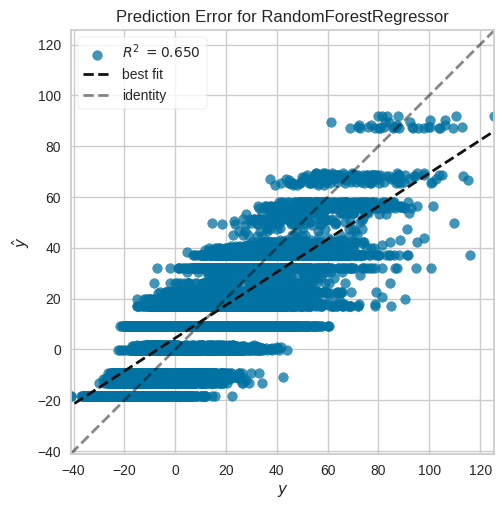

In [44]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_RF, x_train, y_train,  x_test, y_test)

#Quando menos espalhado melhor

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


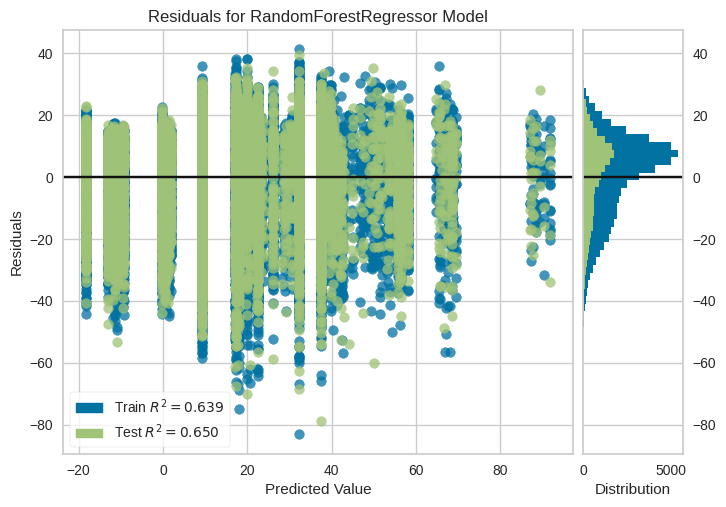

In [45]:
#Gráfico de resíduos
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_RF, x_train, y_train,  x_test, y_test)

#Deve estar bem distribuído ao redor do 0, conforme abaixo

##Validação Cruzada

In [46]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(model_RF, x_train, y_train, cv=cv,scoring=scoring)



In [47]:
cv_results

{'fit_time': array([4.79593372, 4.36886358, 3.31285572, 3.3842392 , 5.08725643]),
 'score_time': array([0.05851269, 0.06065559, 0.05860043, 0.0641191 , 0.07188773]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [49]:
for metric in scoring.keys():
  scores = cv_results[f'test_{metric}']
  mean_score = "{:.3f}".format(scores.mean())
  std_score = "{:.3f}".format(scores.std())

  print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
  print(f"{metric.upper()} Média: {mean_score}, STD: {std_score}")
  print('---------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, STD: 0.088
---------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, STD: 0.101
---------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, STD: 0.008
---------------------------------------------


#Otimização de Hiperparâmetros

##Seleção de Recursos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


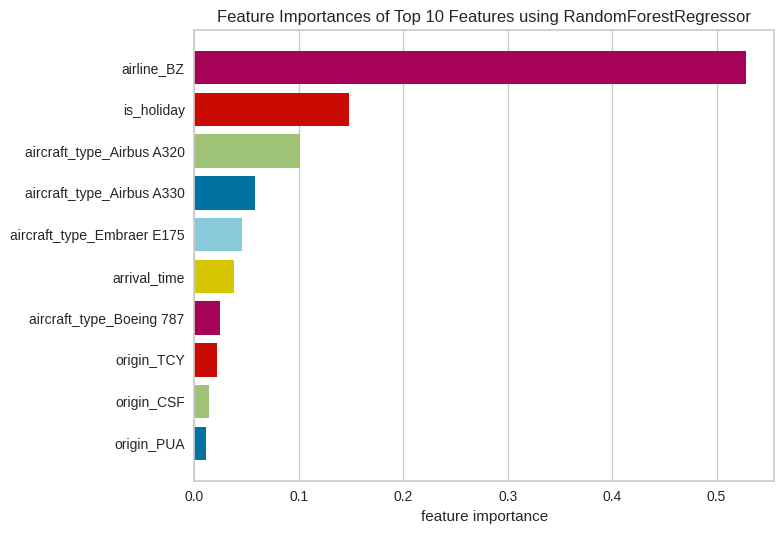

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [51]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_RF, relative=False, topn=10)
viz.fit(x,y)
viz.show()

In [52]:
importances = model_RF.feature_importances_
feature_importances = pd.DataFrame({'Features' :x.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [53]:
#Verificando quantas features são realmente relevantes com base nas métricas

results_df = pd.DataFrame(index=['RMSE','MAE','R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1,5,10,15,20,25,30]:
  selected_features = feature_importances['Features'].values[:count]

  x_train_selected = x_train[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train)

  y_pred = model_selected_features.predict(x_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,23.096979,14.938936,14.300231,13.740631,13.738684,13.728394,13.730148
MAE,18.563694,12.021147,11.490407,11.025276,11.024171,11.012742,11.013830
R2,0.010905,0.586222,0.620848,0.649941,0.650040,0.650564,0.650475


In [55]:
#A partir de 15 os valores mudam muito pouco, portanto, refazendo para 10 a 15 para refinar:

results_df = pd.DataFrame(index=['RMSE','MAE','R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10,16):
  selected_features = feature_importances['Features'].values[:count]

  x_train_selected = x_train[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train)

  y_pred = model_selected_features.predict(x_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.300231,14.300231,14.393948,13.740986,13.740986,13.740631
MAE,11.490407,11.490407,11.409582,11.025599,11.025381,11.025276
R2,0.620848,0.620848,0.615862,0.649923,0.649923,0.649941


In [57]:
#Treinando novamente o modelo com as features mais relevantes da base a fim de melhorar a performance - até 13 features

selected_features = feature_importances['Features'].values[:13]

x_selected_features = x[selected_features]
x_selected_features

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175
0,0,8.885071,False,0,0,1,0,1,0,0,0,0,0
1,0,8.939996,False,0,0,0,1,1,0,0,0,0,0
2,1,18.635384,False,0,1,0,0,0,0,0,0,0,1
3,0,15.967963,False,0,1,0,0,0,1,0,0,0,0
4,0,16.571894,False,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,True,1,1,0,0,0,0,0,0,0,1
71171,0,16.718722,True,1,1,0,0,0,1,0,0,0,0
71172,1,8.564949,True,1,0,1,0,0,0,0,0,1,0
71173,1,9.344097,True,1,1,0,0,1,0,0,0,0,0


In [58]:
#Criando o novo modelo
x_train, x_test, y_train, y_test = train_test_split(x_selected_features, y, random_state=42)

#Otimizando Hiperparâmetros com GridSearchCV

In [59]:
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100,150,200]

}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [64]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [65]:
y_pred_model_grid = model_grid.predict(x_test)

metricas_model_grid = calcular_metricas_regressao(y_test,y_pred_model_grid)
metricas_model_grid

{'Raiz do erro quadrático médio': np.float64(13.263480102584106),
 'Erro absoluto médio': 10.673139196908478,
 'R2 score': 0.6738310789122912}

In [67]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.300231,14.300231,14.393948,13.740986,13.740986,13.740631,13.263480
MAE,11.490407,11.490407,11.409582,11.025599,11.025381,11.025276,10.673139
R2,0.620848,0.620848,0.615862,0.649923,0.649923,0.649941,0.673831


#Salvando o modelo

In [68]:
import pickle

In [69]:
try:

  with open('Modelo_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!')

except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!
